# Results summary

This notebook shows how some of the main figures can be generated.

Note that the data has summarized with ``scripts/summarize_data.py`` to allow a swift online data analysis at minimal cost. Consequently:
* Only the robust average ERFs across subjects is available.
* The decoding scores for each subject is available, but downsampled.

The raw and epoched data will be made publicly available once the manuscript is accepted for publication.

# Prepare data

In [1]:
%matplotlib inline
import pickle
import matplotlib.pyplot as plt
import numpy as np
from jr.plot import pretty_gat, pretty_decod

# ERFs

In [2]:
# Load data  (~14 Mo)
with open('../data/results_evoked.pkl', 'rb') as f:
    erf_analyses = pickle.load(f)

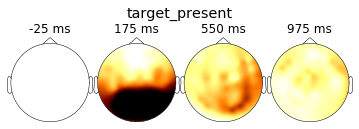

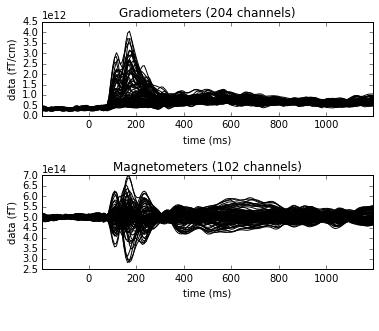

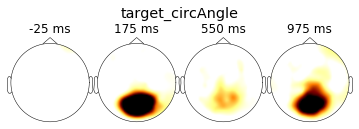

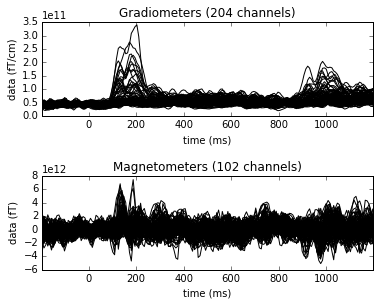

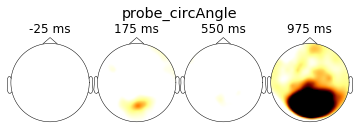

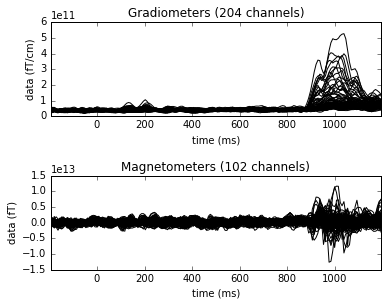

In [3]:
# Define time regions of interest for vizualization purposes
tois = [(-.100, 0.050), (.100, .250), (.300, .800), (.900, 1.050)]

# Here, we will only plot a subselection only to avoid crowding.
# But you can play with the data!
erf_analyses = [a for a in erf_analyses if a['name'] in [
                'target_present', 'target_circAngle', 'probe_circAngle']]

# Plot mean effect size within each toi.
for analysis in erf_analyses:
    name, evoked = analysis['name'], analysis['evoked']
 
    # Note that the grads have already been combined.
    # Adjust color scale from 10th and 90th percentile of combined grads
    vmin, vmax = np.percentile(evoked.data[::3, :], [10, 90])

    # Plot topo of mean effect on TOI
    fig, axes = plt.subplots(1, len(tois), figsize=[6, 2])
    fig.subplots_adjust(wspace=0.01, left=0.)
    for ax, toi in zip(axes, tois):
        evoked.plot_topomap(times=[np.mean(toi)], average=np.ptp(toi),
                            cmap='afmhot_r', ch_type='grad', show=False,
                            contours=False, scale=1, colorbar=False,
                            sensors=False, axes=ax, vmin=vmin, vmax=vmax,
                            title=name)
    # Plot butterfly
    evoked.plot()

# Decoding scores

In [4]:
# Load data  (~31 Mo)
with open('../data/results_decoding.pkl', 'rb') as f:
    gat_analyses = pickle.load(f)

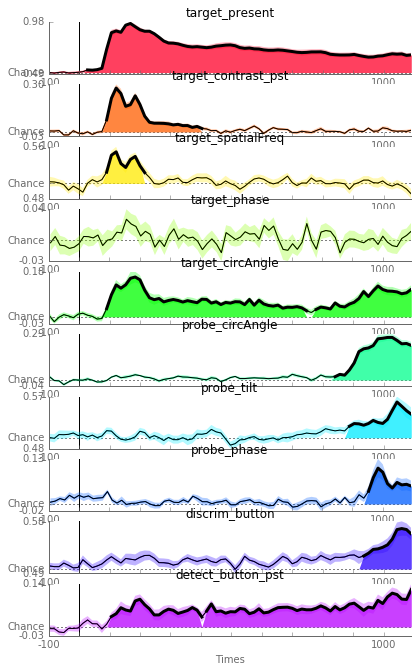

In [5]:
fig, axes = plt.subplots(len(gat_analyses), 1, figsize=[6.5, 11])
for (analysis, ax) in zip(gat_analyses, axes):
    chance = analysis['chance']
    times = analysis['times']
    color = analysis['color']
    
    # Get diagonal scores for each subject to get SEM
    scores_diag = np.array([np.diag(score) for score in analysis['scores']])

    # p values cluster corrected for diagonal results
    pval_diag = analysis['pval_diag']

    # Plot
    pretty_decod(scores_diag, times=times, sig=pval_diag < 0.01,
                 chance=chance, color=color, fill=True, ax=ax)
    ax.set_title(analysis['name'])


# Example of a GAT result: presence

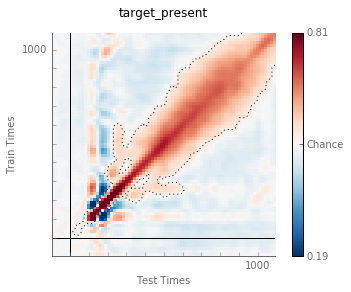

In [6]:
analysis = gat_analyses[0]
chance = analysis['chance']
times = analysis['times']
# mean across subjects
scores = np.mean(analysis['scores'], axis=0)
# p values cluster corrected for whole GAT matrix
pval = analysis['pval']
# plot
fig, ax = plt.subplots(1)
pretty_gat(scores, times=times, sig=pval < 0.01, ax=ax, chance=chance)
ax.set_title(analysis['name'])
plt.show()